In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

import re
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Counting the 'symboling' parameter which ranges from -2 to 3  
dataset['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [6]:
# Counting the "aspiration" property which shows whether the engine's intake is through standarad oygen intake 
#turbocharging
dataset['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

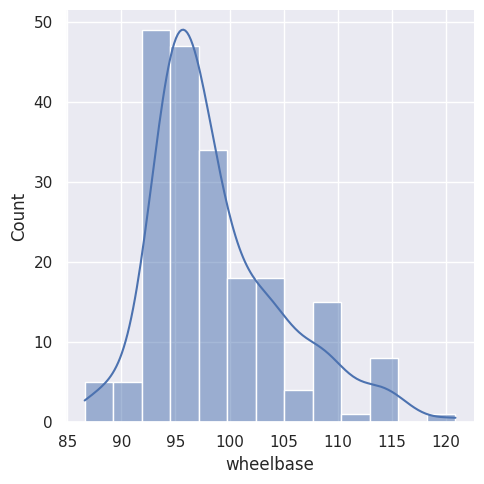

In [7]:
# Distribution of 'wheelbase'
sns.set()
sns.displot(dataset['wheelbase'], kde = True, rug = False)
plt.show()

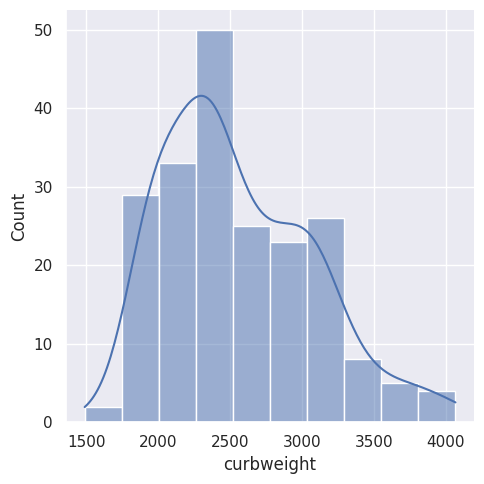

In [8]:
# Distribution of 'curbweight'
sns.set()
sns.displot(dataset['curbweight'], kde = True, rug = False,alpha = 0.5)
plt.show()

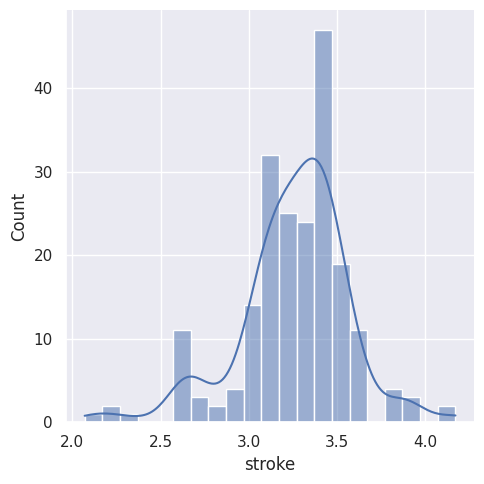

In [9]:
# Distribution of 'stroke'
sns.set()
sns.displot(dataset['stroke'], kde = True, rug = False,alpha = 0.5)
plt.show()

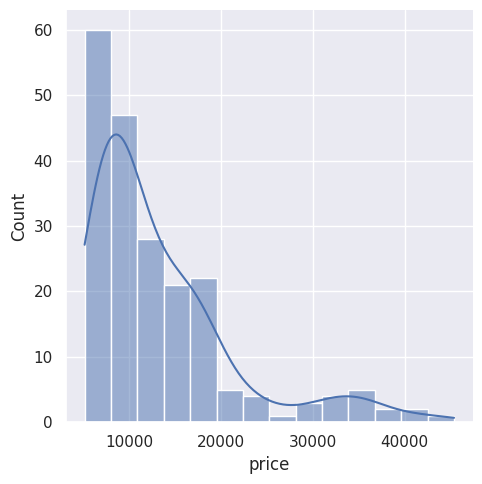

In [10]:
# Distribution of 'price'
sns.set()
sns.displot(dataset['price'], kde = True, rug = False,alpha = 0.5)
plt.show()

In [11]:
# Selecting the variables in 'float64' and 'int'
cars_numeric = dataset.select_dtypes(include = ['float64', 'int'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# Dropping the two variables 
cars_numeric = dataset.drop(['symboling', 'car_ID'], axis = 1)


<Figure size 2000x1000 with 0 Axes>

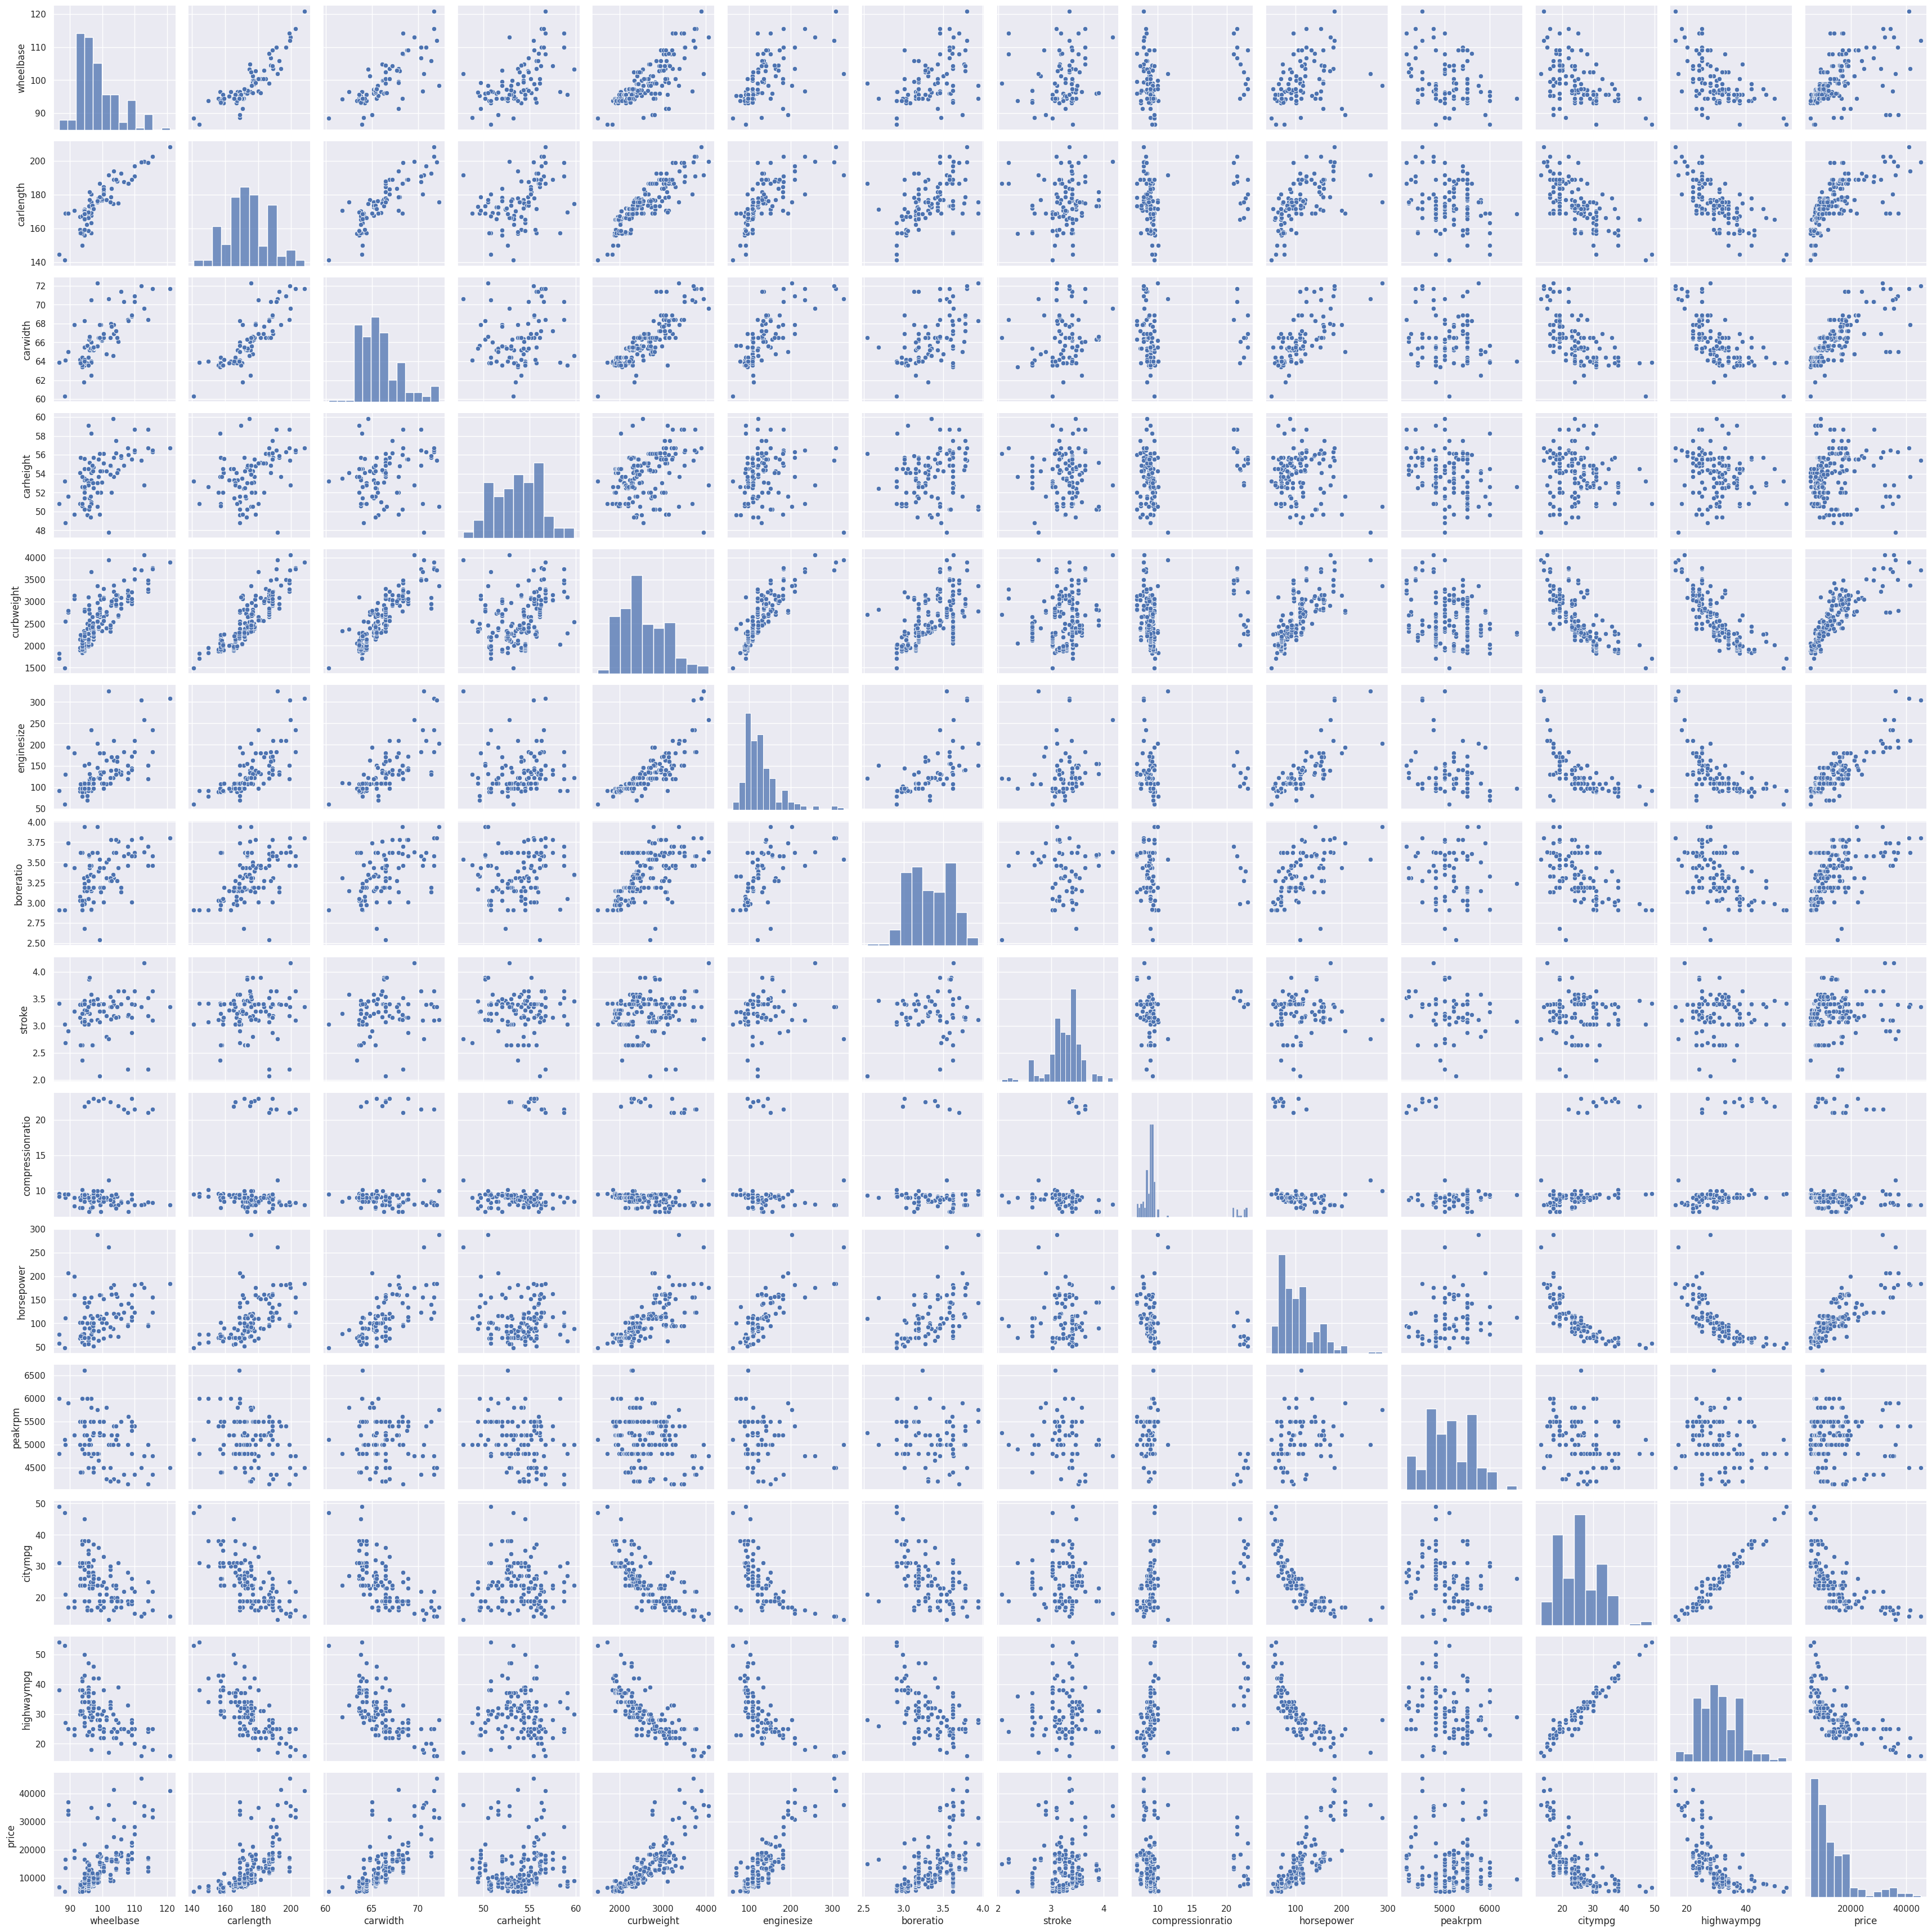

In [13]:
# Pairwise scatter plot
plt.figure(figsize = (20,10))
sns.pairplot(cars_numeric)
plt.show()

In [14]:
# Correlation plot
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


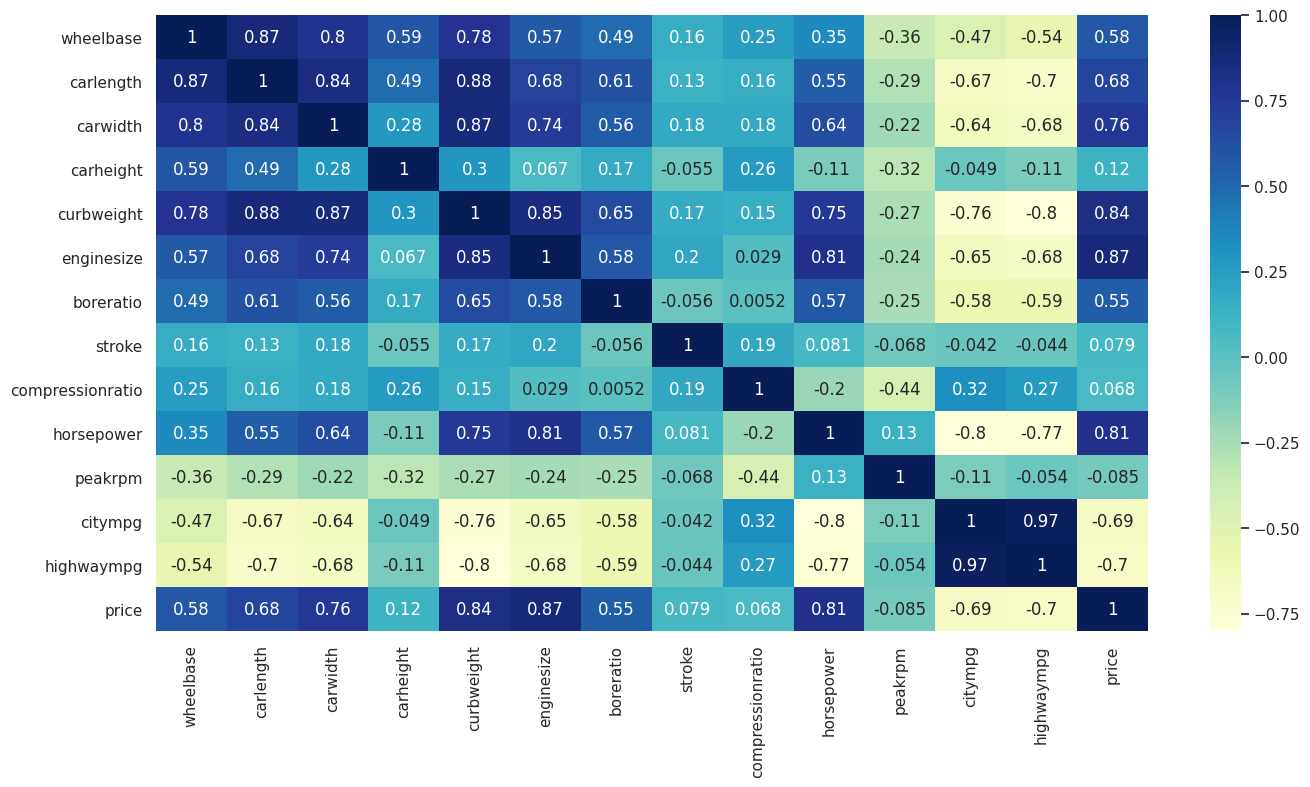

In [15]:
# Correlations on heatmap
plt.figure(figsize = (16,8))

sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()

In [17]:
dataset['symboling'] = dataset['symboling'].astype('object')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
# First few entries
dataset['CarName'][:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

In [19]:
# Extracting only the name
carnames = dataset['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:30]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

In [20]:
# USe regular epressions
p = re.compile(r'\w+-?\w+')
carnames = dataset['CarName'].apply(lambda x: re.findall(p, x)[0])
carnames

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [21]:
dataset['car_company'] = dataset['CarName'].apply(lambda x: re.findall(p,x)[0])

In [22]:
dataset['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

In [29]:
# Renaming all misspelled word
dataset.loc[(dataset['car_company'] == 'vw') | 
           (dataset['car_company'] == 'vokswagen'), 'car_company'] = 'volkswagen'

dataset.loc[dataset['car_company'] == 'porcshce', 'car_company'] = 'porsche'

dataset.loc[dataset['car_company'] == 'toyouta', 'car_company'] = 'toyota'

dataset.loc[dataset['car_company'] == 'Nissan', 'car_company'] = 'nissan'

dataset.loc[dataset['car_company'] == 'maxda', 'car_company'] = 'mazda'



In [30]:
dataset['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [31]:
# dropping carname variable
dataset = dataset.drop('CarName', axis = 1)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [33]:
dataset.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data preparation

In [34]:
# Spliiting into X and Y
X = dataset.loc[:,['symboling', 'fueltype', 'aspiration','doornumber', 'carbody', 
                   'drivewheel','enginelocation', 'wheelbase','carlength','carwidth',
                   'carheight','curbweight','enginetype','cylindernumber','enginesize',
                   'fuelsystem','boreratio','stroke','compressionratio','horsepower',
                   'peakrpm','citympg','highwaympg','car_company']]
y = dataset['price']

In [35]:
# Creating dummy varibales for categorical variables
cars_categorical = X.select_dtypes(include = ['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [36]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first = True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# drop categorical values
X = X.drop(list(cars_categorical.columns), axis = 1)

In [38]:
# Concat dummy variable with x
X = pd.concat([X, cars_dummies], axis = 1)

In [39]:
# Scaling the features
cols = X.columns
X =  pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


In [42]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Model Building and evaluation

In [44]:
# Building the model
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)


LinearRegression()

In [45]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.28804792e+03 -1.04955210e+03  1.68834559e+03 -1.25904071e+03
  2.42027090e+03  1.16263350e+04 -4.85038954e+03 -1.13424087e+03
 -2.56951960e+03 -9.73644812e+02  1.35681433e+03 -2.61818510e+02
  7.44239551e+02  7.36334360e+02  8.01800617e+02  7.02360200e+02
  6.47750839e+02  3.50558608e+02 -1.20683560e+03  1.01248452e+03
 -2.33385958e+02 -7.69280387e+02 -1.83640992e+03 -1.66162816e+03
 -9.12566337e+02 -9.28943930e+01  4.42816604e+02  1.15665864e+03
  5.50557360e+02  6.45972107e+01  1.55937229e+02  9.01690070e+02
 -2.89587453e+02  2.03544173e+03  2.20137145e+03  6.79103088e+03
  1.39274072e+03  1.78808440e+03 -1.04955642e+03  2.03544173e+03
  4.50875447e+02 -1.64299332e+02  1.20683560e+03  1.36424205e-12
 -2.08926886e+02 -5.83874480e+01  2.50111043e-12  5.21573928e+02
  2.39504091e+03  3.76793525e+02 -1.83326364e+02 -6.98406228e+02
 -5.19749514e+02  6.03320099e+01 -4.92211850e+02  3.10813552e+02
  3.41060513e-13 -1.05964701e+03  3.61145168e+02 -4.85552717e+02
 -6.84202629e+02  1.44392

In [47]:
# Prediction
y_pred = lm.predict(X_test)

print(r2_score(y_true = y_test, y_pred = y_pred))

0.8382621393399067


## Model building using RFE

In [52]:
# RFE with 15 features

lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

print(rfe_15.support_)
print(rfe_15.ranking_)

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False]
[ 4  5  1  7  1  1  1  1  9 35 13 45 22 25 27 28 26 29 11  2 37 19  6 17
 18 47 23  1 33 46 24 20 38  1  1  1 32  1  1  1 14 44 10 53 48 50 52 36
  1 39 30 15 21 49 34 42 54  3 40  1 16  1 51  8 31 43 41 12]


/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [56]:
# prediction using rfe model
y_pred = rfe_15.predict(X_test)

# r_squared
print(r2_score(y_test, y_pred))

0.8941491916479425


In [57]:
# RFE with 6 features

lm = LinearRegression()
rfe_6 = RFE(lm,6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# Predict
y_predict = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479425


/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Model building and evaluation


In [60]:
# Subset the features selected by rfe_15
col_15  = X_train.columns[rfe_15.support_]

# subset training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15  = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_peugeot,car_company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114


In [61]:
# fitting the model with 15 variables

lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Sun, 13 Jun 2021   Prob (F-statistic):           1.03e-70
Time:                        18:38:17   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

In [65]:
# making t=prediction using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]

# Adding a constant variable
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant = 'add')
X_test_rfe_15.info()

# Prediction 
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  62 non-null     float64
 1   carwidth               62 non-null     float64
 2   curbweight             62 non-null     float64
 3   enginesize             62 non-null     float64
 4   boreratio              62 non-null     float64
 5   stroke                 62 non-null     float64
 6   enginelocation_rear    62 non-null     float64
 7   enginetype_rotor       62 non-null     float64
 8   cylindernumber_five    62 non-null     float64
 9   cylindernumber_four    62 non-null     float64
 10  cylindernumber_three   62 non-null     float64
 11  cylindernumber_twelve  62 non-null     float64
 12  cylindernumber_two     62 non-null     float64
 13  car_company_bmw        62 non-null     float64
 14  car_company_peugeot    62 non-null     float64
 15  car_c

In [66]:
# r-squared
r2_score(y_test, y_pred)

0.8941491916479424

In [68]:
# subcset the feature selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]


# subset training data or 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)

# fitting the model with 6 features
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()

# making predictions
X_test_rfe_6 = X_test[col_6]


# Adding a constant
X_test_Rfe_6 = sm.add_constant(X_test_rfe_6, has_constant = 'add')
X_test_rfe_6.info()

r2_score(y_test, y_pred)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   carwidth             62 non-null     float64
 1   curbweight           62 non-null     float64
 2   enginesize           62 non-null     float64
 3   enginelocation_rear  62 non-null     float64
 4   car_company_bmw      62 non-null     float64
 5   car_company_porsche  62 non-null     float64
dtypes: float64(6)
memory usage: 3.4 KB


0.8941491916479424

## Choosing the optimal number of features

In [86]:
n_features_list = list(range(4,20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4,20):
    lm = LinearRegression()
    rfe_n = RFE(lm,n_features)
    rfe_n.fit(X_train, y_train)
    col_n = X_train.columns[rfe_n.support_]
    X_train_rfe_n = X_train[col_n]
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
    
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    X_test_rfe_n = X_test[col_n]
    
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant = 'add')
    
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))



/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/ari/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass 

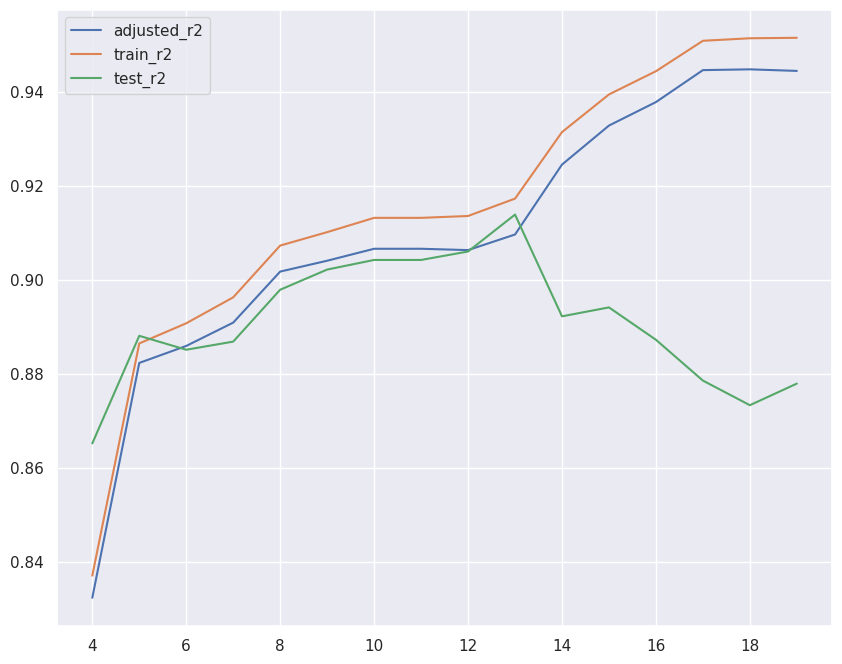

In [90]:
plt.figure(figsize = (10,8));
plt.plot(n_features_list, adjusted_r2, label = 'adjusted_r2');
plt.plot(n_features_list, r2, label = 'train_r2');
plt.plot(n_features_list, test_r2, label = 'test_r2');
plt.legend(loc = 'upper left');
plt.show()

##  Final Model Evaluation

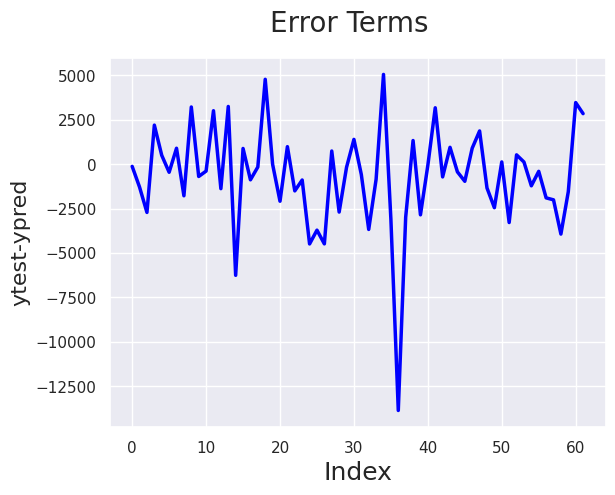

In [97]:
# Error terms
c = [i for i in range(len(y_pred))];
fig = plt.figure();
plt.plot(c,y_test-y_pred, color = 'blue', linewidth = 2.5,);
fig.suptitle('Error Terms', fontsize = 20);
plt.xlabel('Index', fontsize = 18);
plt.ylabel('ytest-ypred', fontsize = 16);
plt.show()

/home/ari/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


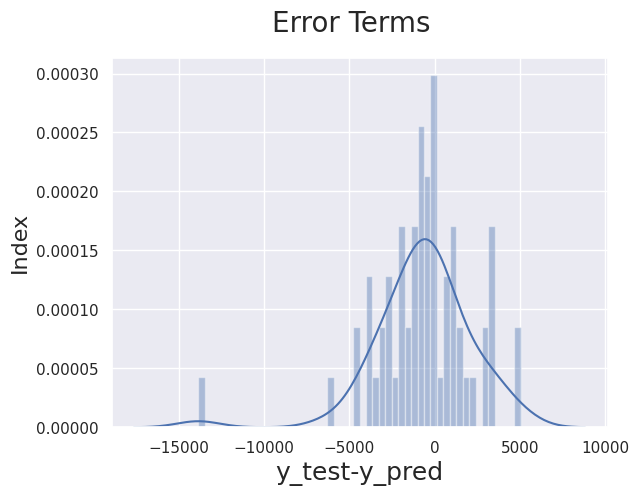

In [101]:
# Plotting the error terms to understand the distribution
fig = plt.figure();
sns.distplot((y_test-y_pred), bins = 50);
fig.suptitle('Error Terms', fontsize = 20);
plt.xlabel('y_test-y_pred', fontsize = 18);
plt.ylabel('Index', fontsize = 16);
plt.show();

In [102]:
# mean
np.mean(y_test-y_pred)

-676.6316335043354

/home/ari/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


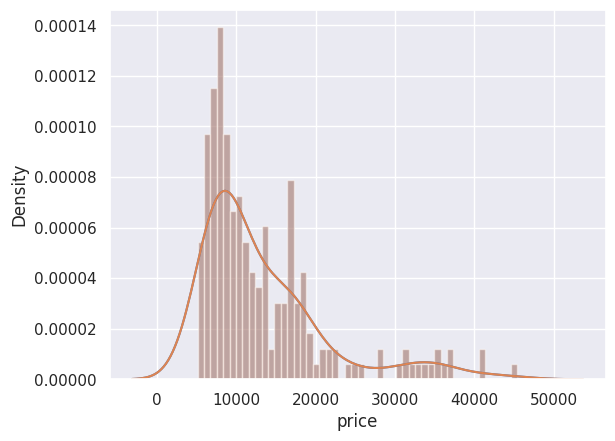

In [104]:
sns.distplot(dataset['price'], bins = 50)
plt.show()

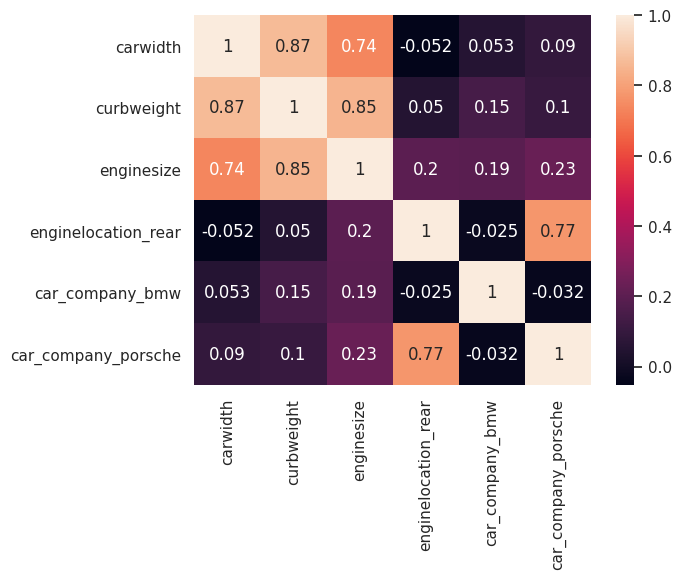

In [108]:
# multico-linearity
predictors = ['carwidth', 'curbweight', 'enginesize', 'enginelocation_rear', 
              'car_company_bmw','car_company_porsche']
cors = X.loc[:,list(predictors)].corr()
sns.heatmap(cors, annot= True)
plt.show()